In [1]:
!pip install -Uqq fastai
!pip install -Uqq librosa

In [2]:
from fastai.data.all import *
from fastai.vision.all import *
import librosa
import matplotlib.pyplot as plot

In [3]:
# path = Path("C:\\Users\\Rango\\Projects\\Lumen\\Dataset\\Dataset\\IRMAS_Training_Data\\")
get_song_files = FileGetter(extensions='.wav', recurse=True)
get_song_files(path)

(#6705) [Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/008__[cel][nod][cla]0058__1.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/008__[cel][nod][cla]0058__2.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/008__[cel][nod][cla]0058__3.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/012__[cel][nod][cla]0043__1.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/012__[cel][nod][cla]0043__2.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/012__[cel][nod][cla]0043__3.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/013__[cel][nod][cla]0025__1.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/013__[cel][nod][cla]0025__2.wav'),Path('C:/Users/Rango/Projects/Lumen/Dataset/Dataset/IRMAS_Training_Data/cel/013__[cel][nod][cla]0025__3.wav'),P

In [4]:
def file_labels(pat: Path):
    r = re.search("\[[^(\[\])]+\]", pat.name)
    if r:
        return [r.group()[1:-1]]
    return []
song_path = path/"cel"/"[cel][cla]0001__1.wav"
file_labels(song_path)

['cel']

<class 'numpy.ndarray'> (513, 259)


Text(0, 0.5, 'Amplitude')

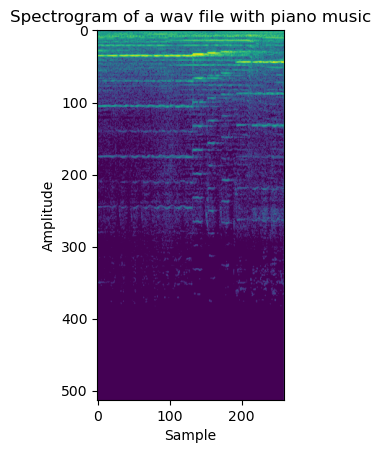

In [5]:
n_fft = 1024
hop_length = 512
f_min = 20
f_max = 8000
# sample_rate = 16000

def open_song(pat: Path):
    son = librosa.load(pat, sr=None) 
    return son

def song2img(son):
    clip, sample_rate = son
    clip = clip[:sample_rate*3]
    stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
    stft_magnitude, _ = librosa.magphase(stft)
    stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)
    return stft_magnitude_db
    
song = open_song(song_path)
spec = song2img(song)
print(type(spec), spec.shape)
plot.title('Spectrogram of a wav file with piano music')
plot.imshow(spec)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

In [6]:
def tfm(pat: Path):
    return song2img(open_song(pat))

sdbl = DataBlock(
    blocks = [ImageBlock, MultiCategoryBlock],
    get_items = get_song_files,
    item_tfms = tfm,
    splitter = RandomSplitter(),
    get_x = tfm,
    get_y = file_labels,
)

['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']


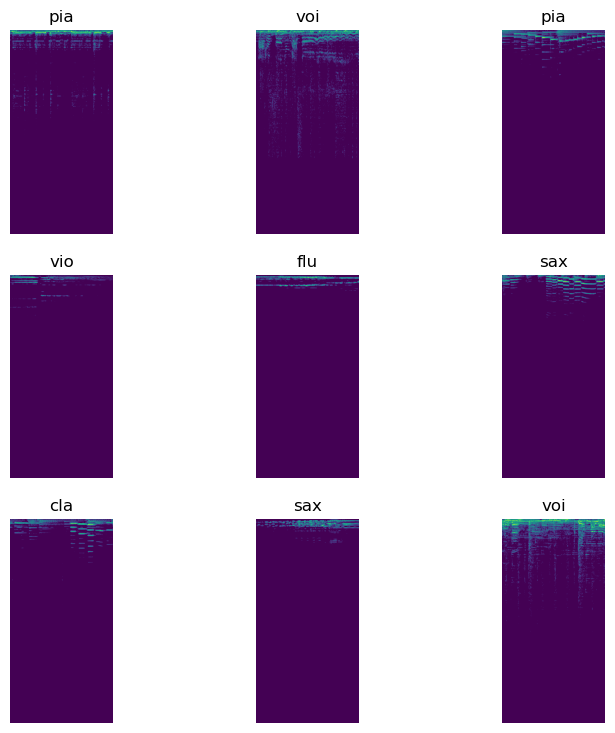

In [7]:
# sdbl.summary(path)
dls = sdbl.dataloaders(path)
print(dls.vocab)
dls.train.show_batch()

In [8]:
learn = vision_learner(dls, weights=ResNet18_Weights.DEFAULT, metrics=accuracy_multi)
learn.fine_tune(2)

C:\Users\Rango\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Rango\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.787716,0.454488,0.809776,01:44


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.387054,0.230757,0.926852,01:43
1,0.266990,0.196134,0.932615,01:42
